In [2]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load the full MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data and flatten the images
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

class GaussianNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.parameters = {}
        for cls in self.classes:
            X_cls = X[y == cls]
            self.parameters[cls] = {
                "mean": X_cls.mean(axis=0),
                "var": X_cls.var(axis=0) + 1e-4
            }

    def predict(self, X):
        predictions = []
        for x in X:
            posteriors = []
            for cls in self.classes:
                prior = np.log(1.0 / len(self.classes))
                class_conditional = np.sum(np.log(self.pdf(cls, x)))
                posterior = prior + class_conditional
                posteriors.append(posterior)
            predictions.append(np.argmax(posteriors))
        return np.array(predictions)

    def pdf(self, cls, x):
        mean = self.parameters[cls]["mean"]
        var = self.parameters[cls]["var"]
        numerator = np.exp(- (x - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

# Creating and training the Naive Bayes Model
model = GaussianNaiveBayes()
model.fit(X_train, y_train)

# Testing the model
predictions = model.predict(X_test)
accuracy = np.mean(predictions == y_test)

print(f"Accuracy: {accuracy}")


2023-12-20 03:01:52.403616: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/var/folders/k0/ylzmkl695wgb5k5wvxhkk3n80000gn/T/ipykernel_73175/3279770415.py:30: RuntimeWarning: divide by zero encountered in log
  class_conditional = np.sum(np.log(self.pdf(cls, x)))


Accuracy: 0.7224


In [6]:
from PIL import Image
import numpy as np

# Load and preprocess your image
img = Image.open('zero.png').convert('L')  # Convert to grayscale
img = img.resize((28, 28), Image.ANTIALIAS)      # Resize to 28x28
img_data = np.array(img)                         # Convert to numpy array
img_data = img_data.reshape(1, -1) / 255.0       # Normalize and flatten

# Predict the digit using the trained model
predicted_digit = model.predict(img_data)
print(f"The predicted digit is: {predicted_digit[0]}")


The predicted digit is: 0


/var/folders/k0/ylzmkl695wgb5k5wvxhkk3n80000gn/T/ipykernel_73175/3279770415.py:30: RuntimeWarning: divide by zero encountered in log
  class_conditional = np.sum(np.log(self.pdf(cls, x)))


In [7]:
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

In [21]:
model_sklearn = GaussianNB()
model_sklearn.fit(X_train, y_train)
predictions_sklearn = model_sklearn.predict(X_test)
accuracy_sklearn = np.mean(predictions_sklearn == y_test)
print(f"Accuracy: {accuracy_sklearn}")


Accuracy: 0.5558


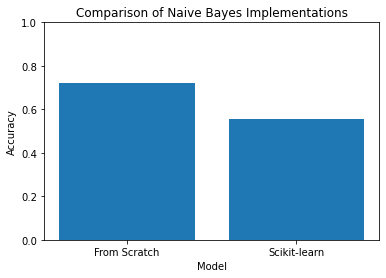

In [22]:

# Plotting the accuracies
plt.bar(['From Scratch', 'Scikit-learn'], [accuracy, accuracy_sklearn])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Naive Bayes Implementations')
plt.ylim([0, 1])  # Accuracy ranges from 0 to 1
plt.show()

In [23]:
import cv2

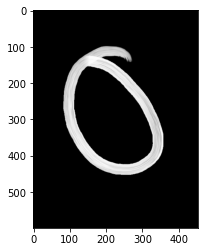

In [65]:
image = cv2.imread('zero.png')
plt.imshow(image)

In [66]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28, 28), interpolation = cv2.INTER_AREA)
img_data = np.array(img)                         # Convert to numpy array
img_data = img_data.reshape(1, -1) / 255.0       # Normalize and flatten

In [67]:
predictions = model.predict(img_data)
print(np.argmax(predictions))

0


/var/folders/k0/ylzmkl695wgb5k5wvxhkk3n80000gn/T/ipykernel_73175/3279770415.py:30: RuntimeWarning: divide by zero encountered in log
  class_conditional = np.sum(np.log(self.pdf(cls, x)))


In [68]:
predictions = model_sklearn.predict(img_data)
print(np.argmax(predictions))

0


In [69]:
predictions = model.predict(X_test)


/var/folders/k0/ylzmkl695wgb5k5wvxhkk3n80000gn/T/ipykernel_73175/3279770415.py:30: RuntimeWarning: divide by zero encountered in log
  class_conditional = np.sum(np.log(self.pdf(cls, x)))


In [70]:
# Choose the number of samples you want to display
num_samples_to_display = 1000

print("Predicted vs True")
for i in range(num_samples_to_display):
    print(f"Predicted: {predictions[i]}, True: {y_test[i]}")

Predicted vs True
Predicted: 7, True: 7
Predicted: 2, True: 2
Predicted: 1, True: 1
Predicted: 0, True: 0
Predicted: 9, True: 4
Predicted: 1, True: 1
Predicted: 4, True: 4
Predicted: 9, True: 9
Predicted: 4, True: 5
Predicted: 9, True: 9
Predicted: 0, True: 0
Predicted: 6, True: 6
Predicted: 9, True: 9
Predicted: 0, True: 0
Predicted: 1, True: 1
Predicted: 0, True: 5
Predicted: 9, True: 9
Predicted: 7, True: 7
Predicted: 2, True: 3
Predicted: 9, True: 4
Predicted: 9, True: 9
Predicted: 6, True: 6
Predicted: 6, True: 6
Predicted: 8, True: 5
Predicted: 9, True: 4
Predicted: 0, True: 0
Predicted: 7, True: 7
Predicted: 9, True: 4
Predicted: 0, True: 0
Predicted: 1, True: 1
Predicted: 3, True: 3
Predicted: 1, True: 1
Predicted: 3, True: 3
Predicted: 0, True: 4
Predicted: 7, True: 7
Predicted: 0, True: 2
Predicted: 7, True: 7
Predicted: 1, True: 1
Predicted: 3, True: 2
Predicted: 1, True: 1
Predicted: 1, True: 1
Predicted: 9, True: 7
Predicted: 9, True: 4
Predicted: 2, True: 2
Predicted: 3, 

In [ ]:
I 